In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
pd.set_option('display.max_rows', 99999)

# Arthmatic & Geometric mean, variance, correlation for the height and age comparision dataset

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Sumit-Raghukant-Soni/statistics-over-csv-in-python/main/NCD_RisC_Lancet_2020_height_child_adolescent_global.csv")

In [ ]:
data.rename(columns={"Age group" : "Age", "Mean height" : "Height"}, inplace=True)
data = data[["Age", "Height"]]

Comparing Mean by manual calcualtion method and direct by pandas function

In [ ]:
xi = data["Age"]
fi = data["Height"]

xifi = []
for i in range(len(xi)):
  xifi.append(xi[i] * fi[i])

xifi = pd.Series(xifi)
mean = xifi.sum()/ fi.sum()

print("The mean found manually : ", mean)

print("The mean by pandas      : ", data.mean())

# print("The mode by pandas      :", data.mode())
data.describe()

The mean found manually :  12.560802506661668
The mean by pandas      :  Age        12.000000
Height    141.759932
dtype: float64


,Age,Height
count,1050.000000,1050.000000
mean,12.000000,141.759932
std,4.322553,19.089428
min,5.000000,105.473062
25%,8.000000,124.924442
50%,12.000000,145.870970
75%,16.000000,156.834721
max,19.000000,170.835994


# Data Visualization

<Axes: xlabel='Age', ylabel='Height'>

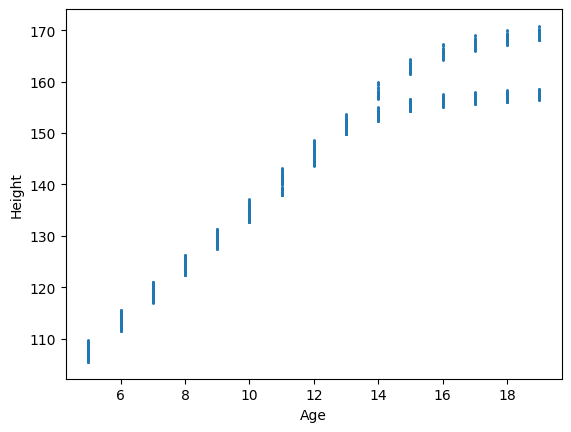

In [ ]:
data.plot(kind='scatter', x='Age', y='Height', s=1)

# Height VS Weight dataset of SOCR

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Sumit-Raghukant-Soni/statistics-over-csv-in-python/main/SOCR-HeightWeight.csv")
data.drop(["Index"], axis=1, inplace=True)
data.columns

Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')

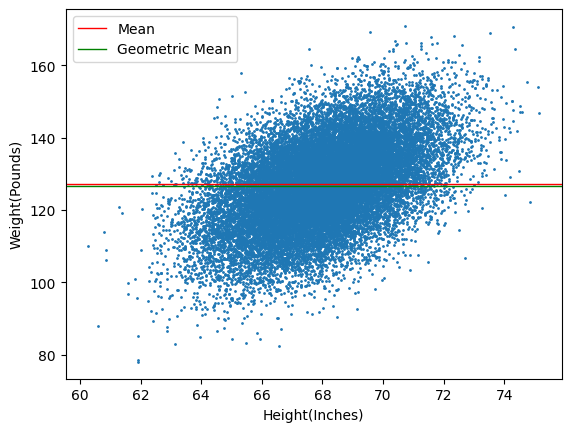

In [ ]:
data.plot(kind='scatter', s=1, x='Height(Inches)', y='Weight(Pounds)')
plt.axhline(y=np.nanmean(data['Weight(Pounds)']), color='red', label='Mean', linewidth=1)
plt.axhline(y=gmean(data['Weight(Pounds)']), color='green', label='Geometric Mean', linewidth=1)
plt.legend()
plt.show()

In [ ]:
print("The covariance of the height and weight data is : ")
print(data.cov())

print("\n\nThe corelation of the height and weight data is : ")
print(data.corr())

The covariance of the height and weight data is : 
                Height(Inches)  Weight(Pounds)
Height(Inches)        3.616382       11.151029
Weight(Pounds)       11.151029      135.976532


The corelation of the height and weight data is : 
                Height(Inches)  Weight(Pounds)
Height(Inches)        1.000000        0.502859
Weight(Pounds)        0.502859        1.000000


# 2) Diabetes data set



In [ ]:
data = pd.read_csv("/content/diabetes.csv")
data.rename(columns={"DiabetesPedigreeFunction" : "Diabetes"}, inplace=True)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diabetes', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
x = data.loc[:, "Pregnancies":"BMI"]
x["Age"] = data["Age"]
y = data["Diabetes"]

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x.values, y.values)

predictedDiabetes = regr.predict([[6, 148, 72, 35, 0, 33.6, 50]])
# predictedDiabetes2 = regr.predict([[1, 85, 66, 29, 0, 26.6, 31]])
print("Actual Value = 0.627 VS predicted value = ", predictedDiabetes)
# print("Actual Value = 0.351 VS predicted value = ", predictedDiabetes2)

Actual Value = 0.627 VS predicted value =  [0.53192622]


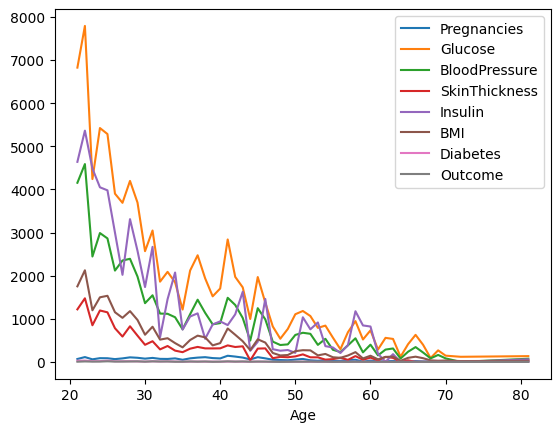

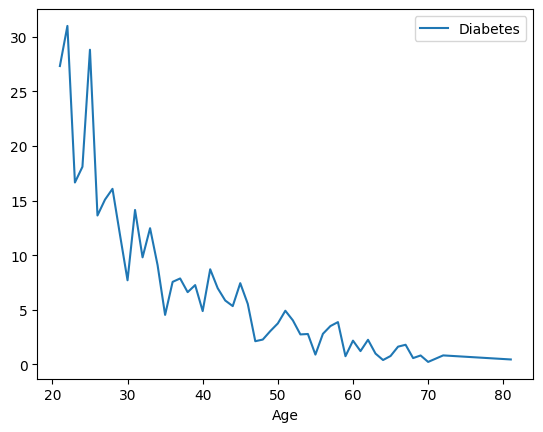

In [ ]:
datagrouped = data.groupby("Age").sum().plot()
datagrouped2 = data.groupby("Age").sum().plot(y="Diabetes")